# Data Understanding

#### Loan

In [5]:
# Convert to date format
loan['applicationDate'] = pd.to_datetime(loan['applicationDate'])
loan['applicationDate'] = loan['applicationDate'].dt.date
loan['originatedDate'] = pd.to_datetime(loan['originatedDate'])
loan['originatedDate'] = loan['originatedDate'].dt.date

In [6]:
# Check the min and max of applicationDate
loan['applicationDate'].min(), loan['applicationDate'].max()

(datetime.date(2014, 12, 3), datetime.date(2017, 3, 18))

In [7]:
# Function to calculate missing values with percentages by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                                    '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
               "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
# Missing values statistics
missing_values_loan = missing_values_table(loan)
missing_values_loan

The selected dataframe has 19 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
originatedDate,531638,92.0
fpStatus,525959,91.0
clarityFraudId,219989,38.1
apr,3922,0.7
loanAmount,2250,0.4
payFrequency,1273,0.2
loanStatus,391,0.1
loanId,256,0.0
state,132,0.0
nPaidOff,24,0.0


In [9]:
# Check the missing values in loanId
loan[loan['loanId'].isna()]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
1668,NaN,8f53d4e3d17fb490a16468f940992475,B,NaN,2015-06-23,False,NaT,0.0,False,0,NaN,NaN,0.0,TX,bvMandatory,3,No Payments,NaN,0
4749,NaN,ca89dd7de41d72d531311479cd9d166d,B,NaN,2016-01-07,False,NaT,0.0,False,0,NaN,NaN,0.0,OH,bvMandatory,6,No Schedule,NaN,0
5970,NaN,5d5adaa9cabb297235b0223c6e7182fc,B,NaN,2016-01-07,False,NaT,0.0,False,0,NaN,NaN,0.0,IL,bvMandatory,3,No Schedule,568e01e0e4b040f8ae2d2694,1
16229,NaN,8e44524a86abe0db1f5c0f6afc9bbd7c,B,NaN,2016-06-15,False,NaT,0.0,False,0,NaN,NaN,0.0,MI,bvMandatory,3,No Payments,5760c831e4b09f30d601f321,1
20193,NaN,213ad4d617b56bee5483f79837bcb6e6,B,NaN,2016-12-22,False,NaT,0.0,False,0,NaN,NaN,0.0,AZ,lead,10,No Payments,585b79e7e4b08f24665c2b46,1
21191,NaN,6fb7174f109a89a35dab5d6e836b8bcb,W,NaN,2016-01-07,False,NaT,0.0,False,0,NaN,NaN,0.0,MI,bvMandatory,3,No Schedule,NaN,0
21389,NaN,4f67ecbc254571de0623b541f5212567,B,NaN,2015-11-03,False,NaT,0.0,False,0,NaN,NaN,0.0,MI,bvMandatory,3,No Schedule,NaN,0
22260,NaN,6547d474986024fb8b52f153b78f9ec4,M,NaN,2016-04-14,False,NaT,0.0,False,0,NaN,NaN,0.0,TN,bvMandatory,3,No Schedule,NaN,0
28672,NaN,ad9e3854914a6ff3db13a42da6d3ccf0,B,NaN,2015-12-10,False,NaT,0.0,False,0,NaN,NaN,0.0,SC,bvMandatory,6,No Schedule,NaN,0
30433,NaN,eb8dc1eafa970fb863a84903e84264ff,B,NaN,2016-01-07,False,NaT,0.0,False,0,NaN,NaN,0.0,IL,bvMandatory,6,No Schedule,NaN,0


##### Remove loan records with missing loanID, even if it contains valid anonymized social security numbers (SSN), as they do not provide valuable information and are suspected to be faulty.

In [10]:
# Remove missing values in loanID 
loan.dropna(subset=['loanId'], inplace=True)

In [11]:
# Change the name of column clarityFraudId to underwritingid
loan.rename(columns={"clarityFraudId": "underwritingid"}, inplace=True)

##### Do not drop duplicated values in anon_ssn as one person may have multiple loan applications

In [12]:
# Check duplicated potential duplicated values in columns "underwritingid", "anon_ssn" and "loanId"
row = ["underwritingid", "anon_ssn", "loanId"]
for i in row:
    num_duplicates = loan[i].duplicated().sum()
    print(f"Column '{i}' has {num_duplicates} duplicated values")

Column 'underwritingid' has 262561 duplicated values
Column 'anon_ssn' has 118160 duplicated values
Column 'loanId' has 0 duplicated values


#### Payment

In [13]:
# Convert to date format
payment['paymentDate'] = pd.to_datetime(payment['paymentDate'])
payment['paymentDate'] = payment['paymentDate'].dt.date

In [14]:
# Check the min and max of paymentDate
payment['paymentDate'].min(), payment['paymentDate'].max()

(datetime.date(2014, 12, 9), datetime.date(2021, 2, 26))

In [15]:
# Missing values statistics
missing_values_payment = missing_values_table(payment)
missing_values_payment

The selected dataframe has 9 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
paymentReturnCode,657831,95.4


In [16]:
# Count the number of occurrences of each unique value in the paymentReturnCode
payment['paymentReturnCode'].value_counts()

R01       22866
R02        2761
R08        2259
R16        1085
R10         620
MISSED      537
R03         318
RXS         226
R09         176
R07         160
C05         106
C01          87
R20          83
R99          60
RAF          58
R04          39
C03          34
C02          10
RWC           7
LPP01         7
R06           6
RUP           6
RBW           5
R29           4
RFG           3
R15           3
R13           2
C07           2
RIR           1
R19           1
RXL           1
Name: paymentReturnCode, dtype: int64

In [17]:
# Count the number of occurrences of each unique value in the paymentStatus
payment['paymentStatus'].value_counts()

Cancelled                  270334
Checked                    209621
None                       164057
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Returned                        1
Complete                        1
Name: paymentStatus, dtype: int64

In [18]:
payment['paymentStatus'] = payment['paymentStatus'].replace('Complete', 'Checked')

In [19]:
cat_columns = ['paymentStatus', 'paymentReturnCode']

In [20]:
# Encode paymentStatus and paymentReturnCode using one hot encoding
ohe = OneHotEncoder(handle_unknown = 'ignore')

# Fit OHE
ohe.fit(payment[cat_columns])
codes = ohe.transform(payment[cat_columns]).toarray()
feature_names = ohe.get_feature_names_out(cat_columns)
encoded_data = pd.DataFrame(codes,columns=feature_names).astype(int)

In [21]:
# concatenate encoded_data with payment
payment_encoded = pd.concat([payment,encoded_data],axis=1)
payment_encoded.shape

(689364, 49)

##### Evaluate applicants' based on paymentStatus and paymentReturnCode of each transactions done <br> For example, when paymentStatus is Checked means the payment is successful, the more the number of Checked status, meaning lower risk for the loan. Evidence to support this assumption can be found in Data Visualization part. 

In [22]:
# Group payment_encoded by loanId and aggregate payment information using sum for paymentStatus and paymentReturnCode 
agg_payment_encoded = payment_encoded.groupby('loanId').agg({
    'isCollection': lambda x: any(x),
    'paymentStatus_Cancelled': 'sum', 
    'paymentStatus_Checked': 'sum',
    'paymentStatus_None': 'sum', 
    'paymentStatus_Pending': 'sum',
    'paymentStatus_Rejected': 'sum', 
    'paymentStatus_Rejected Awaiting Retry': 'sum',
    'paymentStatus_Returned': 'sum', 
    'paymentStatus_Skipped': 'sum',
    'paymentReturnCode_C01': 'sum', 
    'paymentReturnCode_C02': 'sum',
    'paymentReturnCode_C03': 'sum', 
    'paymentReturnCode_C05': 'sum',
    'paymentReturnCode_C07': 'sum', 
    'paymentReturnCode_LPP01': 'sum',
    'paymentReturnCode_MISSED': 'sum', 
    'paymentReturnCode_R01': 'sum',
    'paymentReturnCode_R02': 'sum', 
    'paymentReturnCode_R03': 'sum',
    'paymentReturnCode_R04': 'sum', 
    'paymentReturnCode_R06': 'sum',
    'paymentReturnCode_R07': 'sum', 
    'paymentReturnCode_R08': 'sum',
    'paymentReturnCode_R09': 'sum', 
    'paymentReturnCode_R10': 'sum',
    'paymentReturnCode_R13': 'sum', 
    'paymentReturnCode_R15': 'sum',
    'paymentReturnCode_R16': 'sum', 
    'paymentReturnCode_R19': 'sum',
    'paymentReturnCode_R20': 'sum', 
    'paymentReturnCode_R29': 'sum',
    'paymentReturnCode_R99': 'sum', 
    'paymentReturnCode_RAF': 'sum',
    'paymentReturnCode_RBW': 'sum', 
    'paymentReturnCode_RFG': 'sum',
    'paymentReturnCode_RIR': 'sum', 
    'paymentReturnCode_RUP': 'sum',
    'paymentReturnCode_RWC': 'sum', 
    'paymentReturnCode_RXL': 'sum',
    'paymentReturnCode_RXS': 'sum', 
    'paymentReturnCode_nan': 'sum'
})

In [23]:
agg_payment_encoded = agg_payment_encoded.reset_index().rename(columns={'index': 'loanId'})
agg_payment_encoded

,loanId,isCollection,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentStatus_Rejected Awaiting Retry,paymentStatus_Returned,paymentStatus_Skipped,paymentReturnCode_C01,paymentReturnCode_C02,paymentReturnCode_C03,paymentReturnCode_C05,paymentReturnCode_C07,paymentReturnCode_LPP01,paymentReturnCode_MISSED,paymentReturnCode_R01,paymentReturnCode_R02,paymentReturnCode_R03,paymentReturnCode_R04,paymentReturnCode_R06,paymentReturnCode_R07,paymentReturnCode_R08,paymentReturnCode_R09,paymentReturnCode_R10,paymentReturnCode_R13,paymentReturnCode_R15,paymentReturnCode_R16,paymentReturnCode_R19,paymentReturnCode_R20,paymentReturnCode_R29,paymentReturnCode_R99,paymentReturnCode_RAF,paymentReturnCode_RBW,paymentReturnCode_RFG,paymentReturnCode_RIR,paymentReturnCode_RUP,paymentReturnCode_RWC,paymentReturnCode_RXL,paymentReturnCode_RXS,paymentReturnCode_nan
0,LL-I-00000021,True,0,12,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
1,LL-I-00000231,False,8,2,8,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
2,LL-I-00000238,False,4,7,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
3,LL-I-00000308,False,10,1,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21
4,LL-I-00000355,False,11,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39947,LP-I-00000127,False,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
39948,LP-I-00000134,False,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
39949,LP-I-00000139,False,0,12,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
39950,LP-I-00000142,False,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13


#### Clarity

In [24]:
# Missing values statistics
missing_values_clarity = missing_values_table(clarity)
missing_values_clarity

The selected dataframe has 54 columns.
There are 53 columns that have missing values.


,Missing Values,% of Total Values
.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,48237,97.0
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncodedescription,47083,94.6
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,47083,94.6
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,44125,88.7
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription,44125,88.7
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,40723,81.9
.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile,39697,79.8
.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone,28336,57.0
.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone,28336,57.0
.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid,5049,10.1


In [25]:
sns.set(rc={'figure.figsize':(10, 10)})

<AxesSubplot:xlabel='clearfraudscore', ylabel='Count'>

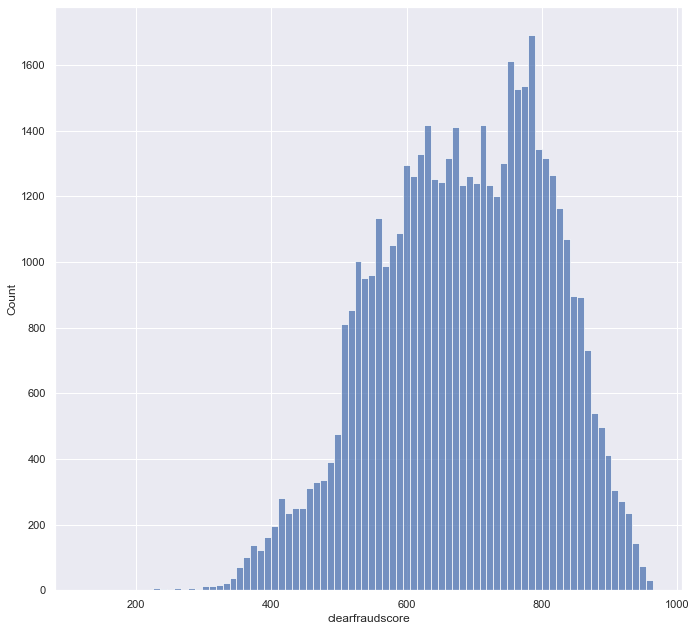

In [26]:
# A high clear fraud score indicates that a loan is less likely to be fraudulent
sns.histplot(data=clarity, x="clearfraudscore")

In [27]:
# object_columns = clarity.select_dtypes(include='object')
# float_columns = clarity.select_dtypes(include='float64')
# object_columns['clearfraudscore'] = float_columns['clearfraudscore'].copy()

In [28]:
# # Plot the distribution of each values in object datatype columns against clearfraudscore
# for i in object_columns.drop(['clearfraudscore', 'underwritingid'], axis=1).keys():
#     sns.histplot(data=clarity, x="clearfraudscore", hue=i, stat='density', common_norm=False)
#     plt.show()

In [29]:
# # Plot the distribution of each numeric datatype columns against clearfraudscore
# for i in float_columns.keys():
#     sns.scatterplot(data=float_columns, x="clearfraudscore", y=i)
#     plt.title(i)
#     plt.show()

In [30]:
# Select only underwritingid and clearfraudscore
clarity_clearfraudscore = clarity[['underwritingid', 'clearfraudscore']]

#### Loan x Payment x Clarity

In [31]:
# Merge loan, payment and clarity tables together
df = pd.merge(loan, agg_payment_encoded, on='loanId', how='left')
df = pd.merge(df, clarity_clearfraudscore, on='underwritingid', how='left')
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,underwritingid,hasCF,isCollection,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentStatus_Rejected Awaiting Retry,paymentStatus_Returned,paymentStatus_Skipped,paymentReturnCode_C01,paymentReturnCode_C02,paymentReturnCode_C03,paymentReturnCode_C05,paymentReturnCode_C07,paymentReturnCode_LPP01,paymentReturnCode_MISSED,paymentReturnCode_R01,paymentReturnCode_R02,paymentReturnCode_R03,paymentReturnCode_R04,paymentReturnCode_R06,paymentReturnCode_R07,paymentReturnCode_R08,paymentReturnCode_R09,paymentReturnCode_R10,paymentReturnCode_R13,paymentReturnCode_R15,paymentReturnCode_R16,paymentReturnCode_R19,paymentReturnCode_R20,paymentReturnCode_R29,paymentReturnCode_R99,paymentReturnCode_RAF,paymentReturnCode_RBW,paymentReturnCode_RFG,paymentReturnCode_RIR,paymentReturnCode_RUP,paymentReturnCode_RWC,paymentReturnCode_RXL,paymentReturnCode_RXS,paymentReturnCode_nan,clearfraudscore
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23,False,NaT,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19,True,2016-01-20,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,False,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,879.0
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01,False,NaT,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06,False,NaT,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05,False,NaT,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577421,LL-I-12122269,801262d04720d32040612759857f4147,B,590.0,2016-11-08,False,NaT,0.0,False,0,Withdrawn Application,400.0,1292.41,NV,bvMandatory,3,NaN,58220cdde4b051c58d919c1f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577422,LL-I-16183462,e37750de9d99a67e0fa96a51e86fdf5b,S,490.0,2017-01-24,False,NaT,0.0,False,0,Withdrawn Application,1000.0,2592.39,MO,lead,25,NaN,5887d349e4b08f249ac45e2f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577423,LL-I-06962710,d7e55e85266208ac4c353f42ebcde5ca,B,590.0,2016-02-02,False,NaT,0.0,False,0,Withdrawn Application,300.0,844.75,IN,bvMandatory,6,NaN,550b1f59e4b0d4592e28c84e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Data Preparation

##### Only funded loans are considered, where idFunded = 1

In [32]:
df = df[df['isFunded'] == 1]

In [33]:
# Missing values statistics
missing_values_df = missing_values_table(df)
missing_values_df

The selected dataframe has 61 columns.
There are 45 columns that have missing values.


,Missing Values,% of Total Values
clearfraudscore,6894,17.7
underwritingid,6622,17.0
paymentReturnCode_R99,104,0.3
paymentReturnCode_R08,104,0.3
paymentReturnCode_R09,104,0.3
paymentReturnCode_R10,104,0.3
paymentReturnCode_R13,104,0.3
paymentReturnCode_R15,104,0.3
paymentReturnCode_R16,104,0.3
paymentReturnCode_R19,104,0.3


##### fpStatus <br>
9 missing values. 8 of them are because 'None' from paymentStatus column in payment table is recognised as NaN, remaining 1 is because it is not found in payment table<br>

Steps:<br>
1. fill the 8 NaN with None<br>
2. and remove the last nan (suspicous, no payment until 2021)<br>

In [34]:
df[df['fpStatus'].isna() == True]['loanId'].unique()

array(['LL-I-03851940', 'LL-I-04040626', 'LL-T-00317558', 'LL-I-00984037',
       'LL-I-04464756', 'LL-I-18496618', 'LL-T-01984747', 'LL-I-03443286',
       'LL-I-02769536'], dtype=object)

In [35]:
# filter the dataframe to rows where the loanID is the 9 missing fpStatus corresponding loanID
mask = payment['loanId'].isin(['LL-I-03851940', 'LL-I-04040626', 'LL-T-00317558', 'LL-I-00984037','LL-I-04464756', 
                               'LL-I-18496618', 'LL-T-01984747', 'LL-I-03443286','LL-I-02769536'])

fpStatus_nan = payment[mask]

# group by loanID and select the first row for each group
fpStatus_nan = fpStatus_nan.groupby('loanId').first()
fpStatus_nan = fpStatus_nan.reset_index().rename(columns={'index': 'loanId'})
fpStatus_nan[['loanId', 'paymentStatus']]

,loanId,paymentStatus
0,LL-I-00984037,None
1,LL-I-02769536,None
2,LL-I-03443286,None
3,LL-I-03851940,None
4,LL-I-04040626,None
5,LL-I-04464756,None
6,LL-T-00317558,None
7,LL-T-01984747,None


In [36]:
# Replace NaN with 'None'
df.loc[df['loanId'].isin(['LL-I-03851940', 'LL-I-04040626', 'LL-T-00317558', 'LL-I-00984037','LL-I-04464756', 
                          'LL-T-01984747', 'LL-I-03443286','LL-I-02769536']), 'fpStatus'] = 'None'

In [37]:
# Remove the one missing value because it is not found in payment table
df.drop(df[df['loanId'] == 'LL-I-18496618'].index, inplace=True)

C:\Users\noeln\AppData\Local\Temp\ipykernel_18276\289946171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['loanId'] == 'LL-I-18496618'].index, inplace=True)


In [38]:
# Remove this because it seems suspicious, no payment since 2017
df.drop(df[df['fpStatus'] == 'Returned'].index, inplace=True)

C:\Users\noeln\AppData\Local\Temp\ipykernel_18276\2520919348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['fpStatus'] == 'Returned'].index, inplace=True)


##### nPaidOff <br>
21 missing values, filled with median

In [39]:
df['nPaidOff'] = df['nPaidOff'].fillna(df['nPaidOff'].median())

C:\Users\noeln\AppData\Local\Temp\ipykernel_18276\1410921526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nPaidOff'] = df['nPaidOff'].fillna(df['nPaidOff'].median())


##### isCollection <br> 
104 missing values<br>
Same problem with paymentReturnCode and paymentStatus<br>
remove all of them

In [40]:
df[df['isCollection'].isna() == True].describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentStatus_Rejected Awaiting Retry,paymentStatus_Returned,paymentStatus_Skipped,paymentReturnCode_C01,paymentReturnCode_C02,paymentReturnCode_C03,paymentReturnCode_C05,paymentReturnCode_C07,paymentReturnCode_LPP01,paymentReturnCode_MISSED,paymentReturnCode_R01,paymentReturnCode_R02,paymentReturnCode_R03,paymentReturnCode_R04,paymentReturnCode_R06,paymentReturnCode_R07,paymentReturnCode_R08,paymentReturnCode_R09,paymentReturnCode_R10,paymentReturnCode_R13,paymentReturnCode_R15,paymentReturnCode_R16,paymentReturnCode_R19,paymentReturnCode_R20,paymentReturnCode_R29,paymentReturnCode_R99,paymentReturnCode_RAF,paymentReturnCode_RBW,paymentReturnCode_RFG,paymentReturnCode_RIR,paymentReturnCode_RUP,paymentReturnCode_RWC,paymentReturnCode_RXL,paymentReturnCode_RXS,paymentReturnCode_nan,clearfraudscore
count,103.000000,103.000000,103.0,103.000000,103.000000,103.000000,103.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
mean,421.917767,0.368932,1.0,1385.941748,4342.308641,22.048544,0.990291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.750000
std,204.061513,1.009662,0.0,1108.761655,3713.238049,17.088225,0.098533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.658773
min,159.000000,0.000000,1.0,300.000000,710.080000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523.000000
25%,206.500000,0.000000,1.0,500.000000,1328.395000,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,559.000000
50%,449.990000,0.000000,1.0,750.000000,2046.380000,25.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604.000000
75%,595.000000,0.000000,1.0,2600.000000,8535.055000,40.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651.750000
max,681.000000,7.000000,1.0,3900.000000,13565.430000,40.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696.000000


In [41]:
df[df['isCollection'].isna() == True]['loanId'].isin(payment['loanId']).sum()

0

In [42]:
df[df['isCollection'].isna() == True]['loanId'].to_numpy()

array(['LL-I-18537570', 'LL-I-18574284', 'LL-I-18619260', 'LL-I-18516060',
       'LL-I-18545351', 'LL-I-18584520', 'LL-I-18571864', 'LL-I-18589170',
       'LL-I-18547233', 'LL-I-18401799', 'LL-I-18538278', 'LL-I-18611067',
       'LL-I-18614963', 'LL-I-18571077', 'LL-I-18628365', 'LL-I-18615217',
       'LL-I-18568539', 'LL-I-18597698', 'LL-I-18590610', 'LL-I-18297431',
       'LL-I-18608691', 'LL-I-18292147', 'LL-I-18612943', 'LL-I-18354064',
       'LL-I-18456533', 'LL-I-18194894', 'LL-I-18614455', 'LL-I-18628898',
       'LL-I-18592979', 'LL-I-18336015', 'LL-I-18245979', 'LL-I-18358520',
       'LL-I-18611923', 'LL-I-18306121', 'LL-I-18479296', 'LL-I-18596423',
       'LL-I-18595098', 'LL-I-18552825', 'LL-I-18503858', 'LL-I-18420293',
       'LL-I-18604206', 'LL-I-18619359', 'LL-I-18620395', 'LL-I-18540045',
       'LL-I-18419282', 'LL-I-18440054', 'LL-I-18375768', 'LL-I-18537496',
       'LL-I-18628037', 'LL-I-18579971', 'LL-I-18500965', 'LL-I-18545891',
       'LL-I-18297746', '

In [43]:
# Remove isCollection, paymentReturnCode and paymentStatus with missing values
for i in df[df['isCollection'].isna() == True]['loanId'].to_numpy(): 
    df.drop(df[df['loanId'] == i].index, inplace=True)

C:\Users\noeln\AppData\Local\Temp\ipykernel_18276\260298875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['loanId'] == i].index, inplace=True)


In [44]:
# Convert into int datatype
encode = {True : 1, False : 0}

df['isCollection'] = df['isCollection'].map(encode)
df['originated'] = df['originated'].map(encode)
df['approved'] = df['approved'].map(encode)

C:\Users\noeln\AppData\Local\Temp\ipykernel_18276\2932112451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isCollection'] = df['isCollection'].map(encode)
C:\Users\noeln\AppData\Local\Temp\ipykernel_18276\2932112451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['originated'] = df['originated'].map(encode)
C:\Users\noeln\AppData\Local\Temp\ipykernel_18276\2932112451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

##### Check numeric outliers

In [45]:
sns.set(rc={'figure.figsize':(10, 10)})

apr                                     AxesSubplot(0.08,0.641765;0.395455x0.238235)
nPaidOff                            AxesSubplot(0.554545,0.641765;0.395455x0.238235)
loanAmount                              AxesSubplot(0.08,0.355882;0.395455x0.238235)
originallyScheduledPaymentAmount    AxesSubplot(0.554545,0.355882;0.395455x0.238235)
leadCost                                    AxesSubplot(0.08,0.07;0.395455x0.238235)
clearfraudscore                         AxesSubplot(0.554545,0.07;0.395455x0.238235)
dtype: object

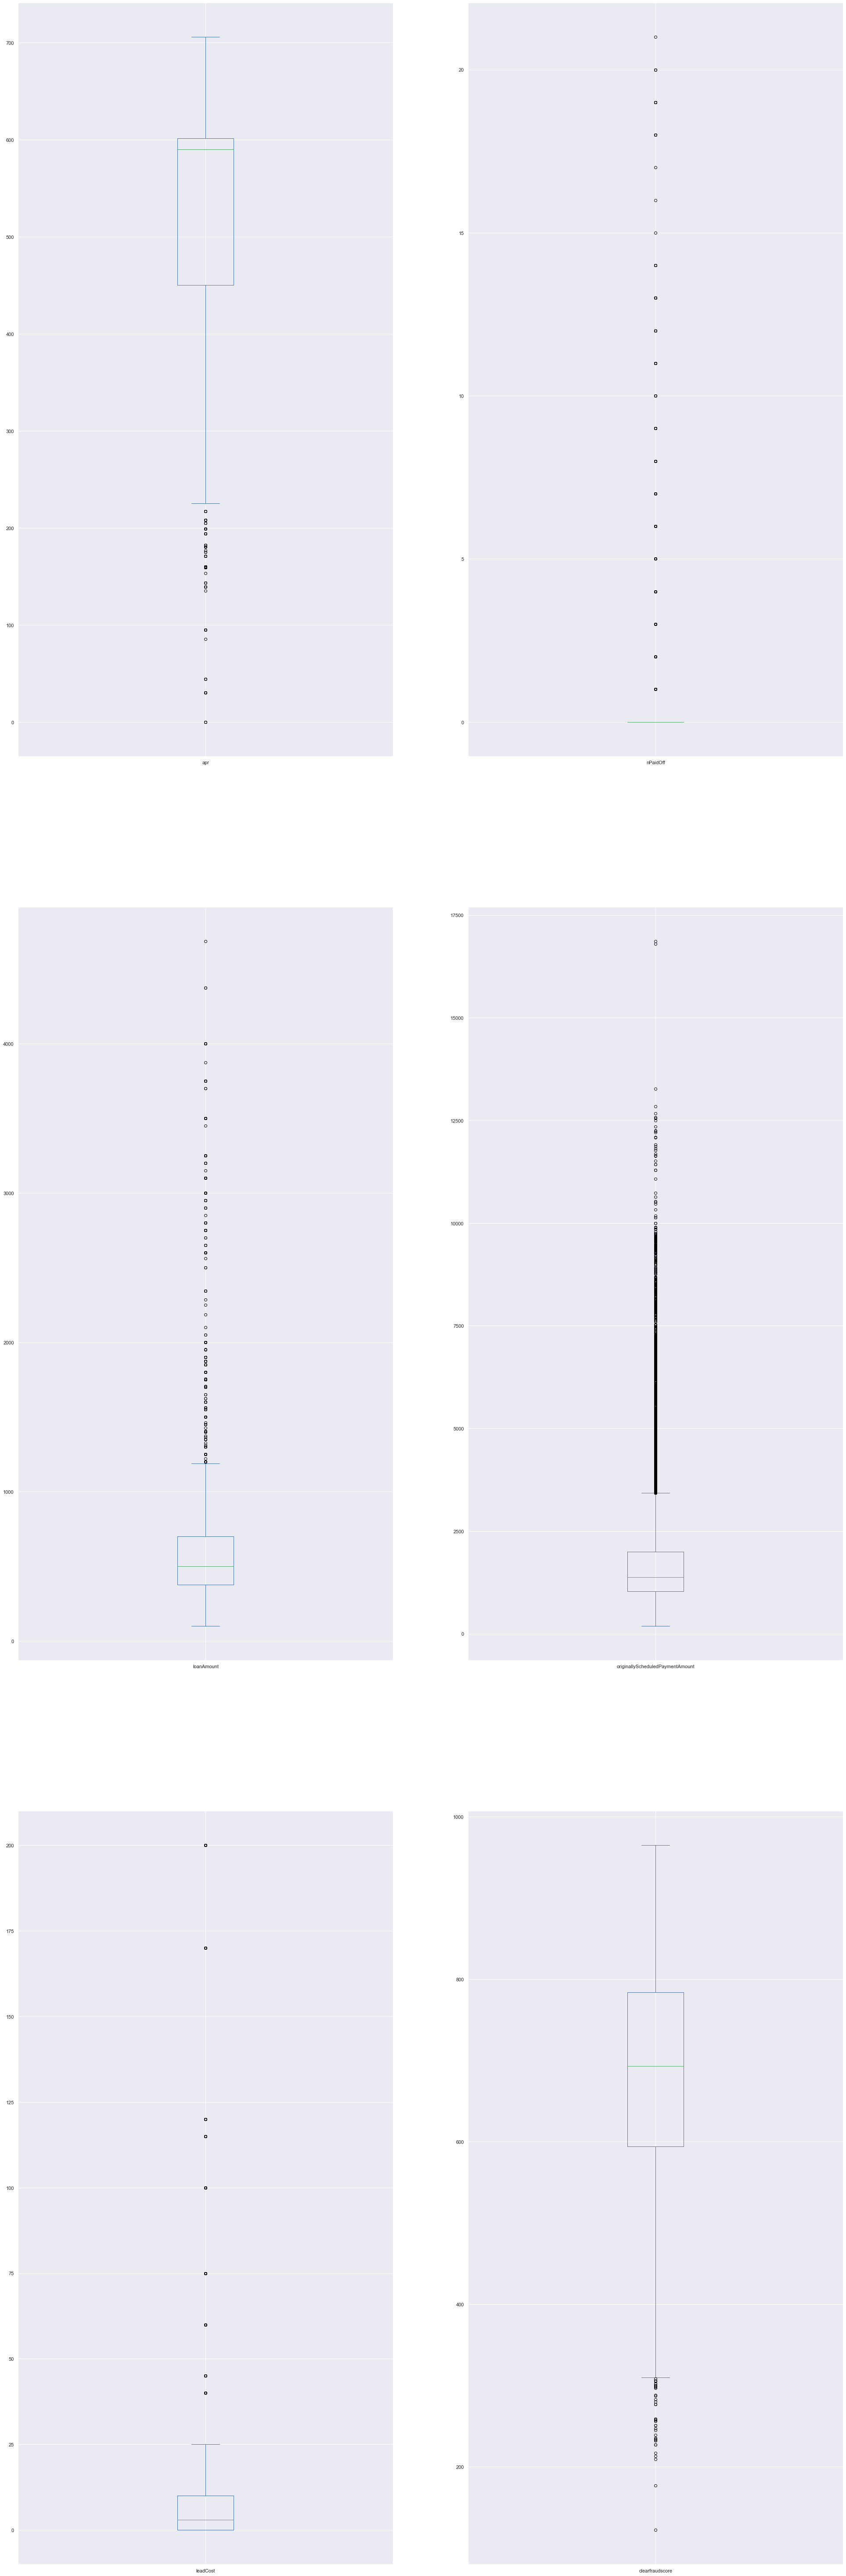

In [46]:
#plot boxlot for each numerical column
df[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 
    'clearfraudscore']].plot(kind="box",subplots=True, layout=(3,2), figsize=(30,100))

##### Check categorical formatting error

In [47]:
# Observe the values in columns to see if there is any formatting error or spelling error
column_categorical = ['payFrequency','loanStatus','state','leadType','fpStatus']

length_col=len(column_categorical)
def col_values(table):
    m = 0
    while m < length_col:
        columns_values = table[column_categorical[m]].unique()
        print(column_categorical[m],": ",columns_values,"\n")
        m = m + 1
        
col_values(df)

payFrequency :  ['B' 'W' 'S' 'M' 'I'] 

loanStatus :  ['Paid Off Loan' 'New Loan' 'Internal Collection' 'External Collection'
 'Returned Item' 'Pending Paid Off' 'Charged Off Paid Off'
 'Settled Bankruptcy' 'Settlement Paid Off' 'Charged Off'
 'Settlement Pending Paid Off'] 

state :  ['CA' 'MO' 'NJ' 'WI' 'IL' 'MI' 'FL' 'SC' 'OH' 'NV' 'IN' 'VA' 'TN' 'OK'
 'NC' 'TX' 'PA' 'HI' 'MS' 'KY' 'AL' 'GA' 'NM' 'ID' 'ND' 'AZ' 'CO' 'NE'
 'SD' 'MN' 'LA' 'CT' 'WY' 'KS' 'DE' 'WA' 'UT' 'RI' 'IA' 'AK' 'MD'] 

leadType :  ['prescreen' 'organic' 'lead' 'bvMandatory' 'rc_returning' 'california'
 'instant-offer' 'express' 'repeat' 'lionpay'] 

fpStatus :  ['Checked' 'Rejected' 'Skipped' 'Cancelled' 'None' 'Pending'] 



##### Create a new column loanRisk and convert the values in loanStatus to Low and High respectively

In [48]:
loanStatus_encode = {'Paid Off Loan' : 'Low', 'New Loan' : 'Low', 'Pending Paid Off' : 'Low', 'Internal Collection' : 'High', 
                     'External Collection' : 'High', 'Returned Item' : 'High', 'Charged Off Paid Off' : 'High', 
                     'Settled Bankruptcy' : 'High', 'Settlement Paid Off' : 'High', 'Charged Off' : 'High', 
                     'Settlement Pending Paid Off' : 'High'}

df['loanRisk'] = df['loanStatus'].map(loanStatus_encode)

C:\Users\noeln\AppData\Local\Temp\ipykernel_18276\2235382052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loanRisk'] = df['loanStatus'].map(loanStatus_encode)


In [49]:
df = df.drop(['loanStatus'], axis=1)

In [50]:
df['loanRisk'].value_counts()

Low     19621
High    19256
Name: loanRisk, dtype: int64

In [51]:
row = ["underwritingid", "anon_ssn", "loanId"]
for i in row:
    num_duplicates = df[i].duplicated().sum()
    print(f"Column '{i}' has {num_duplicates} duplicated values")

Column 'underwritingid' has 8184 duplicated values
Column 'anon_ssn' has 4313 duplicated values
Column 'loanId' has 0 duplicated values


In [52]:
df.reset_index(drop=True, inplace=True)

In [53]:
df = df.drop(['applicationDate', 'originated', 'originatedDate', 'approved', 'isFunded', 'originallyScheduledPaymentAmount', 
              'underwritingid', 'hasCF', 'paymentStatus_Returned'], axis=1)

In [54]:
df

,loanId,anon_ssn,payFrequency,apr,nPaidOff,loanAmount,state,leadType,leadCost,fpStatus,isCollection,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentStatus_Rejected Awaiting Retry,paymentStatus_Skipped,paymentReturnCode_C01,paymentReturnCode_C02,paymentReturnCode_C03,paymentReturnCode_C05,paymentReturnCode_C07,paymentReturnCode_LPP01,paymentReturnCode_MISSED,paymentReturnCode_R01,paymentReturnCode_R02,paymentReturnCode_R03,paymentReturnCode_R04,paymentReturnCode_R06,paymentReturnCode_R07,paymentReturnCode_R08,paymentReturnCode_R09,paymentReturnCode_R10,paymentReturnCode_R13,paymentReturnCode_R15,paymentReturnCode_R16,paymentReturnCode_R19,paymentReturnCode_R20,paymentReturnCode_R29,paymentReturnCode_R99,paymentReturnCode_RAF,paymentReturnCode_RBW,paymentReturnCode_RFG,paymentReturnCode_RIR,paymentReturnCode_RUP,paymentReturnCode_RWC,paymentReturnCode_RXL,paymentReturnCode_RXS,paymentReturnCode_nan,clearfraudscore,loanRisk
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,0.0,3000.0,CA,prescreen,0,Checked,0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,879.0,Low
1,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2.0,350.0,MO,organic,0,Checked,0,0.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,NaN,Low
2,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,0.0,400.0,NJ,lead,40,Checked,0,0.0,0.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,658.0,Low
3,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2.0,1250.0,MO,organic,0,Checked,0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,835.0,Low
4,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,0.0,800.0,CA,bvMandatory,10,Checked,0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,624.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38872,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,3.0,600.0,CA,rc_returning,0,Checked,0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,Low
38873,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,0.0,375.0,AL,lead,25,Checked,0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,700.0,Low
38874,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,0.0,400.0,WI,lead,40,Checked,0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,806.0,Low
38875,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,0.0,600.0,IN,lead,25,Checked,0,0.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,769.0,Low


# Data Visualization

In [55]:
count_loanRisk = df.groupby('state')['loanRisk'].value_counts().unstack()
agg_clearfraudscore = df.groupby('state').agg({'clearfraudscore':'median', 'apr':'mean'})
state = pd.merge(count_loanRisk, agg_clearfraudscore, on='state', how='left')
state['difference'] = state['Low'] - state['High']
state = state.reset_index().rename(columns={'index': 'state'})
state.sort_values('difference',ascending=False)

,state,High,Low,clearfraudscore,apr,difference
12,IL,2032.0,3110.0,723.0,356.051731,1078.0
30,PA,530.0,820.0,758.0,616.607407,290.0
37,VA,546.0,813.0,712.0,366.654150,267.0
39,WI,1164.0,1416.0,667.0,476.244139,252.0
4,CO,136.0,317.0,737.0,180.200000,181.0
25,NJ,543.0,670.0,740.0,619.142622,127.0
5,CT,116.0,237.0,766.0,593.682691,121.0
22,NC,723.0,822.0,634.0,578.515139,99.0
19,MN,129.0,224.0,767.0,616.798867,95.0
13,IN,810.0,879.0,745.0,591.842904,69.0


In [56]:
sns.set(rc={'figure.figsize':(50, 30)})

<AxesSubplot:>

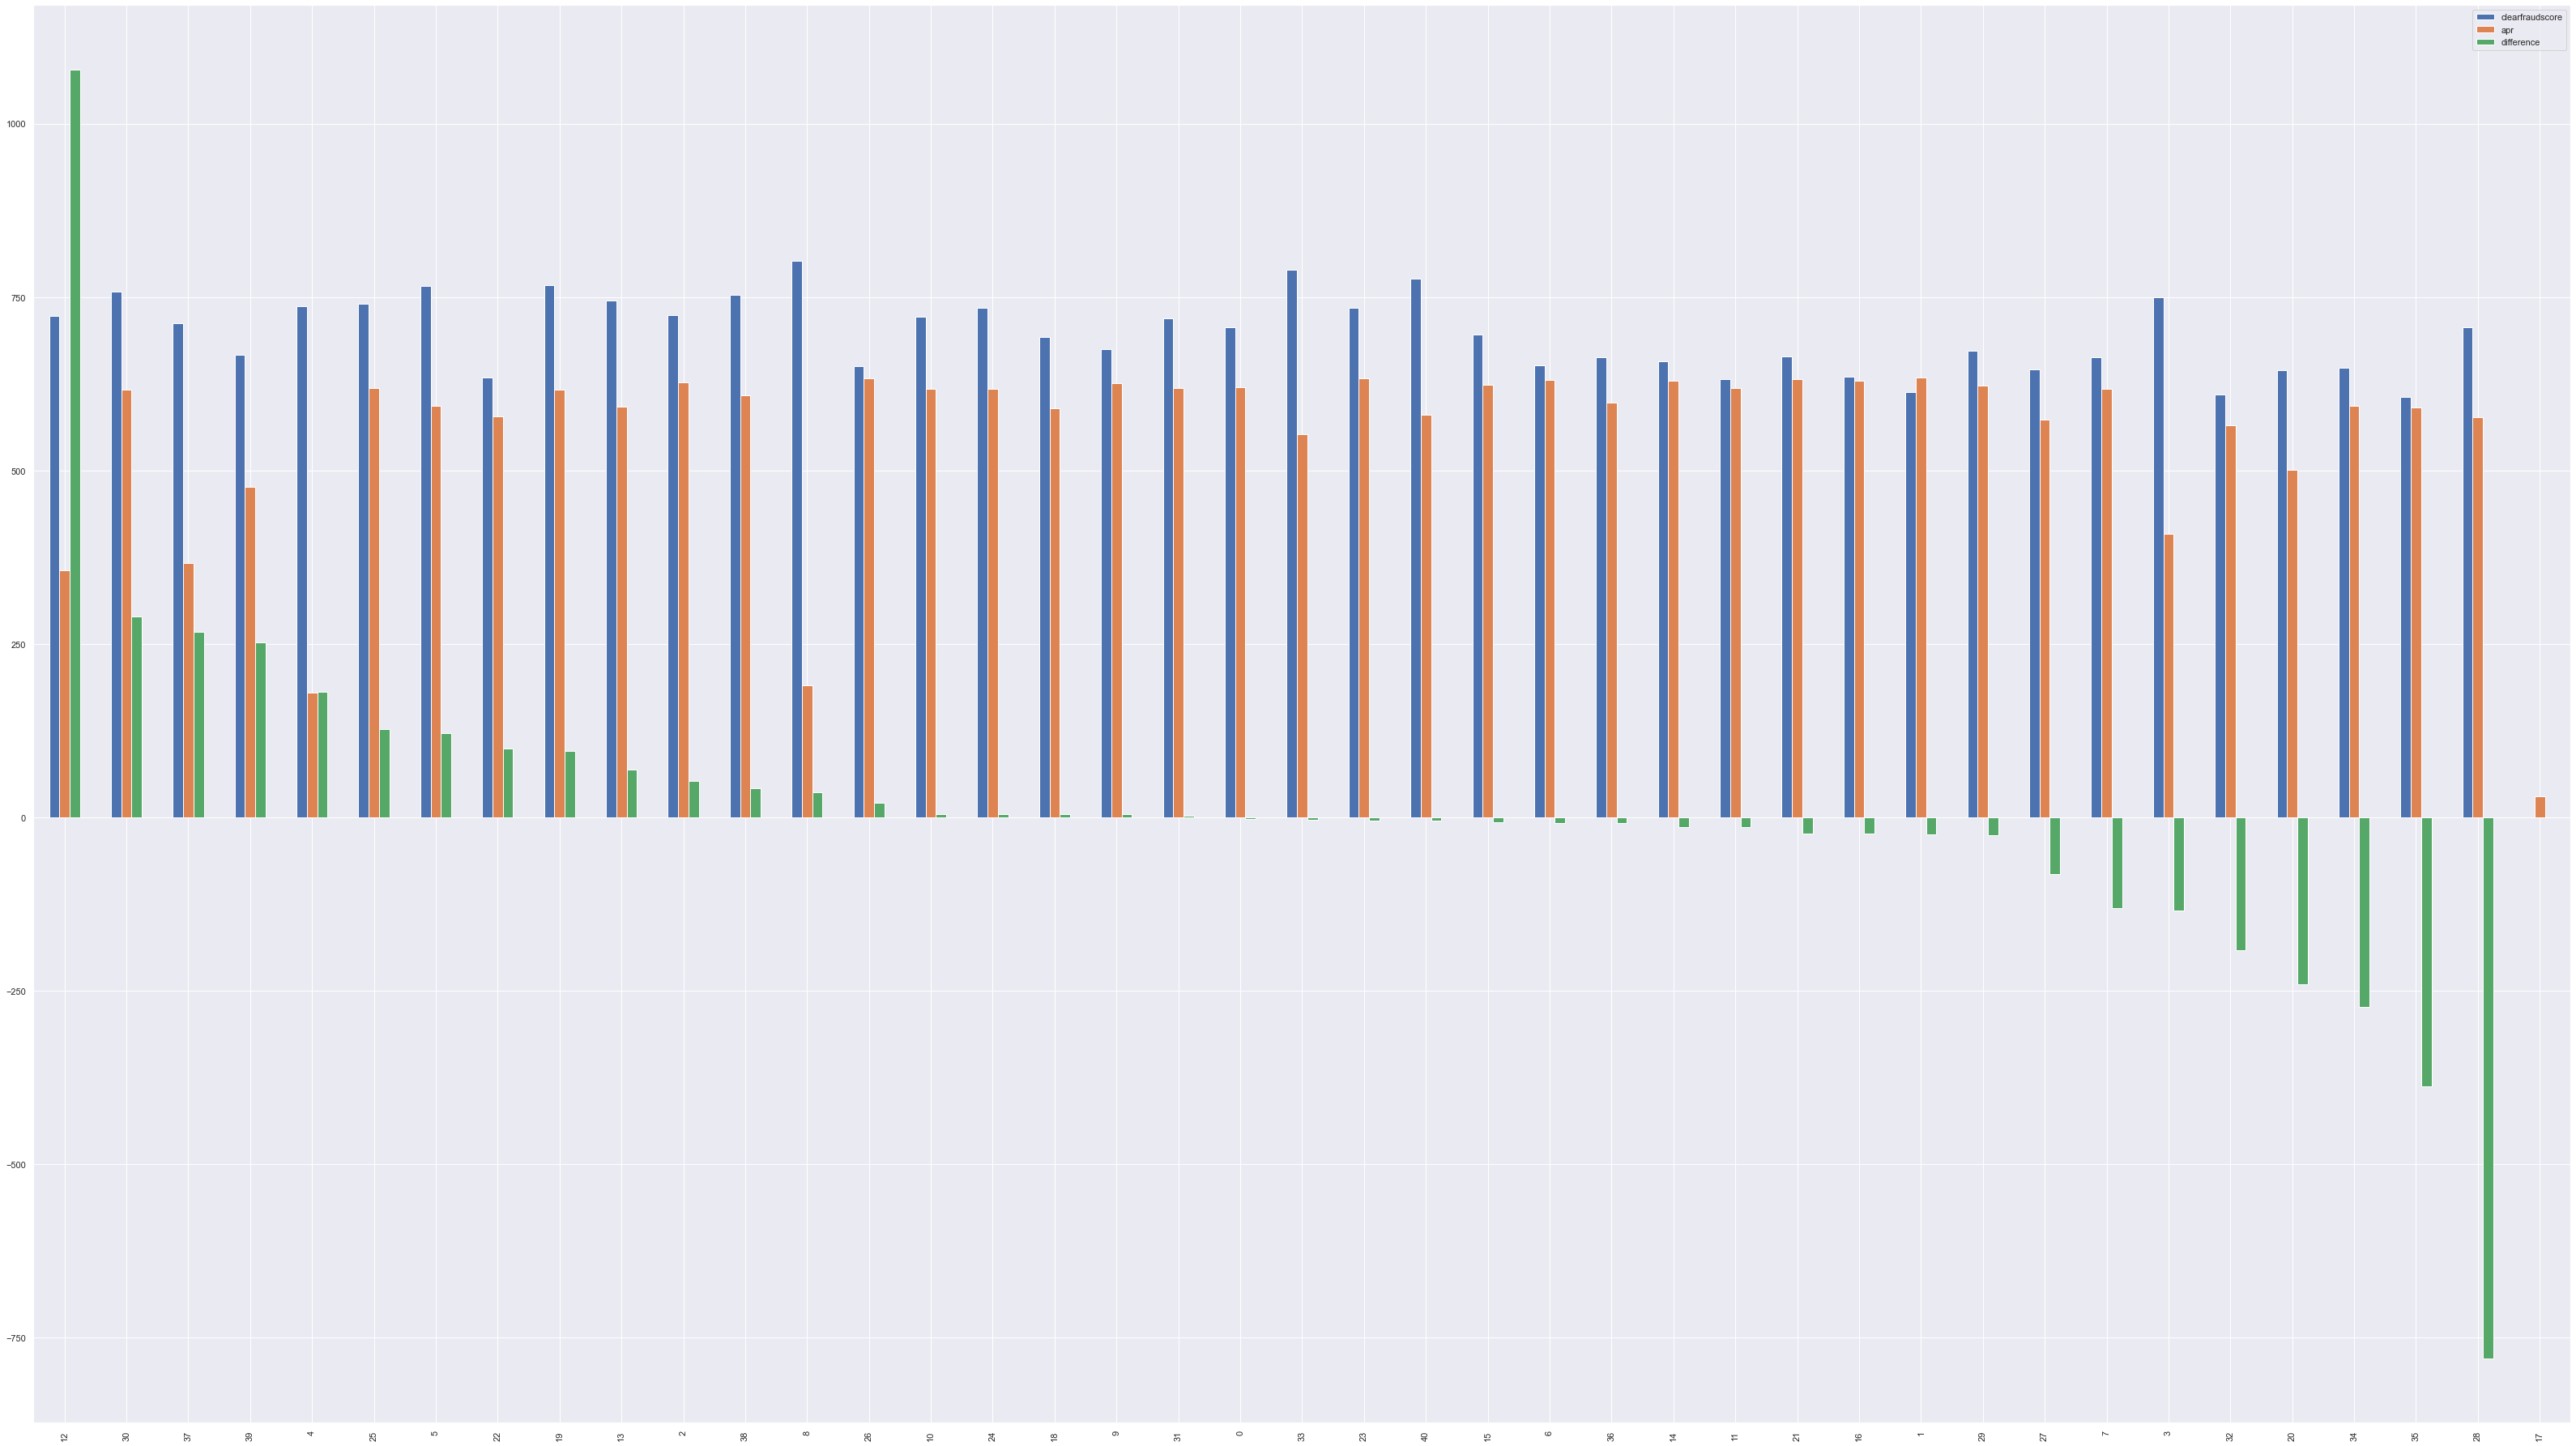

In [57]:
state[['state', 'clearfraudscore', 'apr', 'difference']].sort_values('difference',ascending=False).plot(kind='bar')

In [58]:
df['clearfraudscore'].min(), df['clearfraudscore'].max()

(122.0, 965.0)

In [59]:
risk_cfs = df.groupby('loanRisk').agg({'clearfraudscore':'mean'})
risk_cfs

,clearfraudscore
loanRisk,
High,660.404784
Low,711.486397


In [60]:
sns.set(rc={'figure.figsize':(20, 10)})

<AxesSubplot:xlabel='nPaidOff', ylabel='clearfraudscore'>

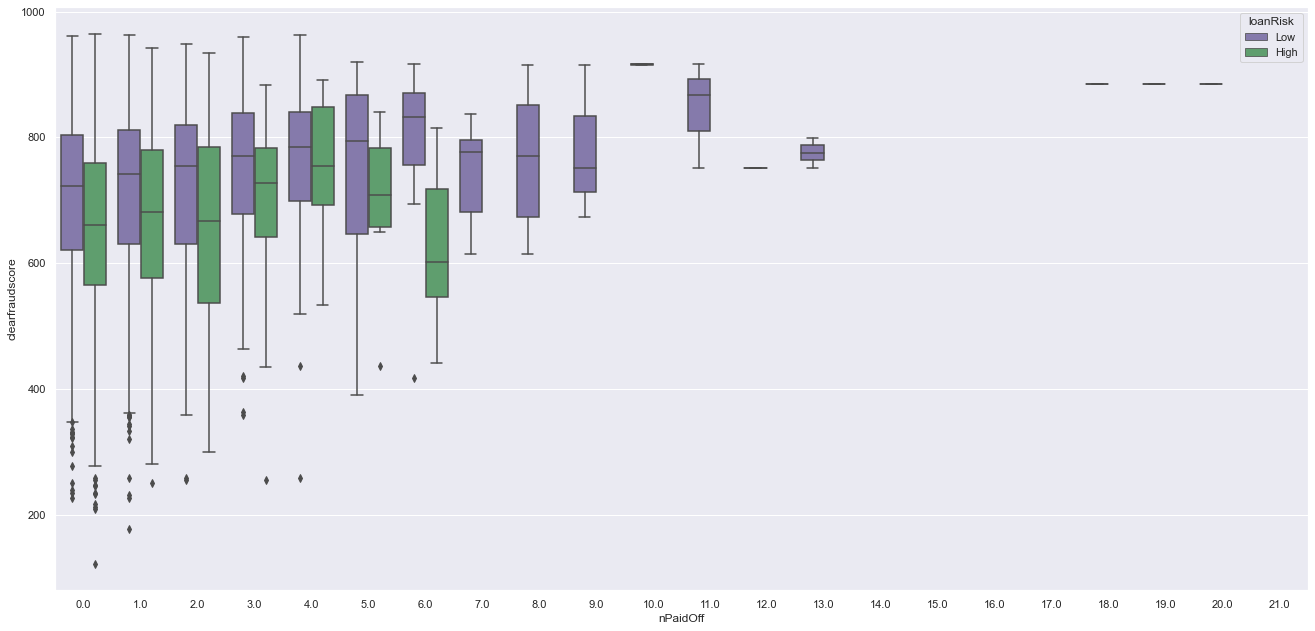

In [61]:
sns.boxplot(data=df, x="nPaidOff", y="clearfraudscore", hue="loanRisk", palette=["m", "g"])

In [62]:
loanRisk_num_encode = {'High' : 1, 'Low' : 0}

df['loanRisk_num'] = df['loanRisk'].map(loanRisk_num_encode)

In [63]:
sns.set(rc={'figure.figsize':(50, 50)})

<AxesSubplot:>

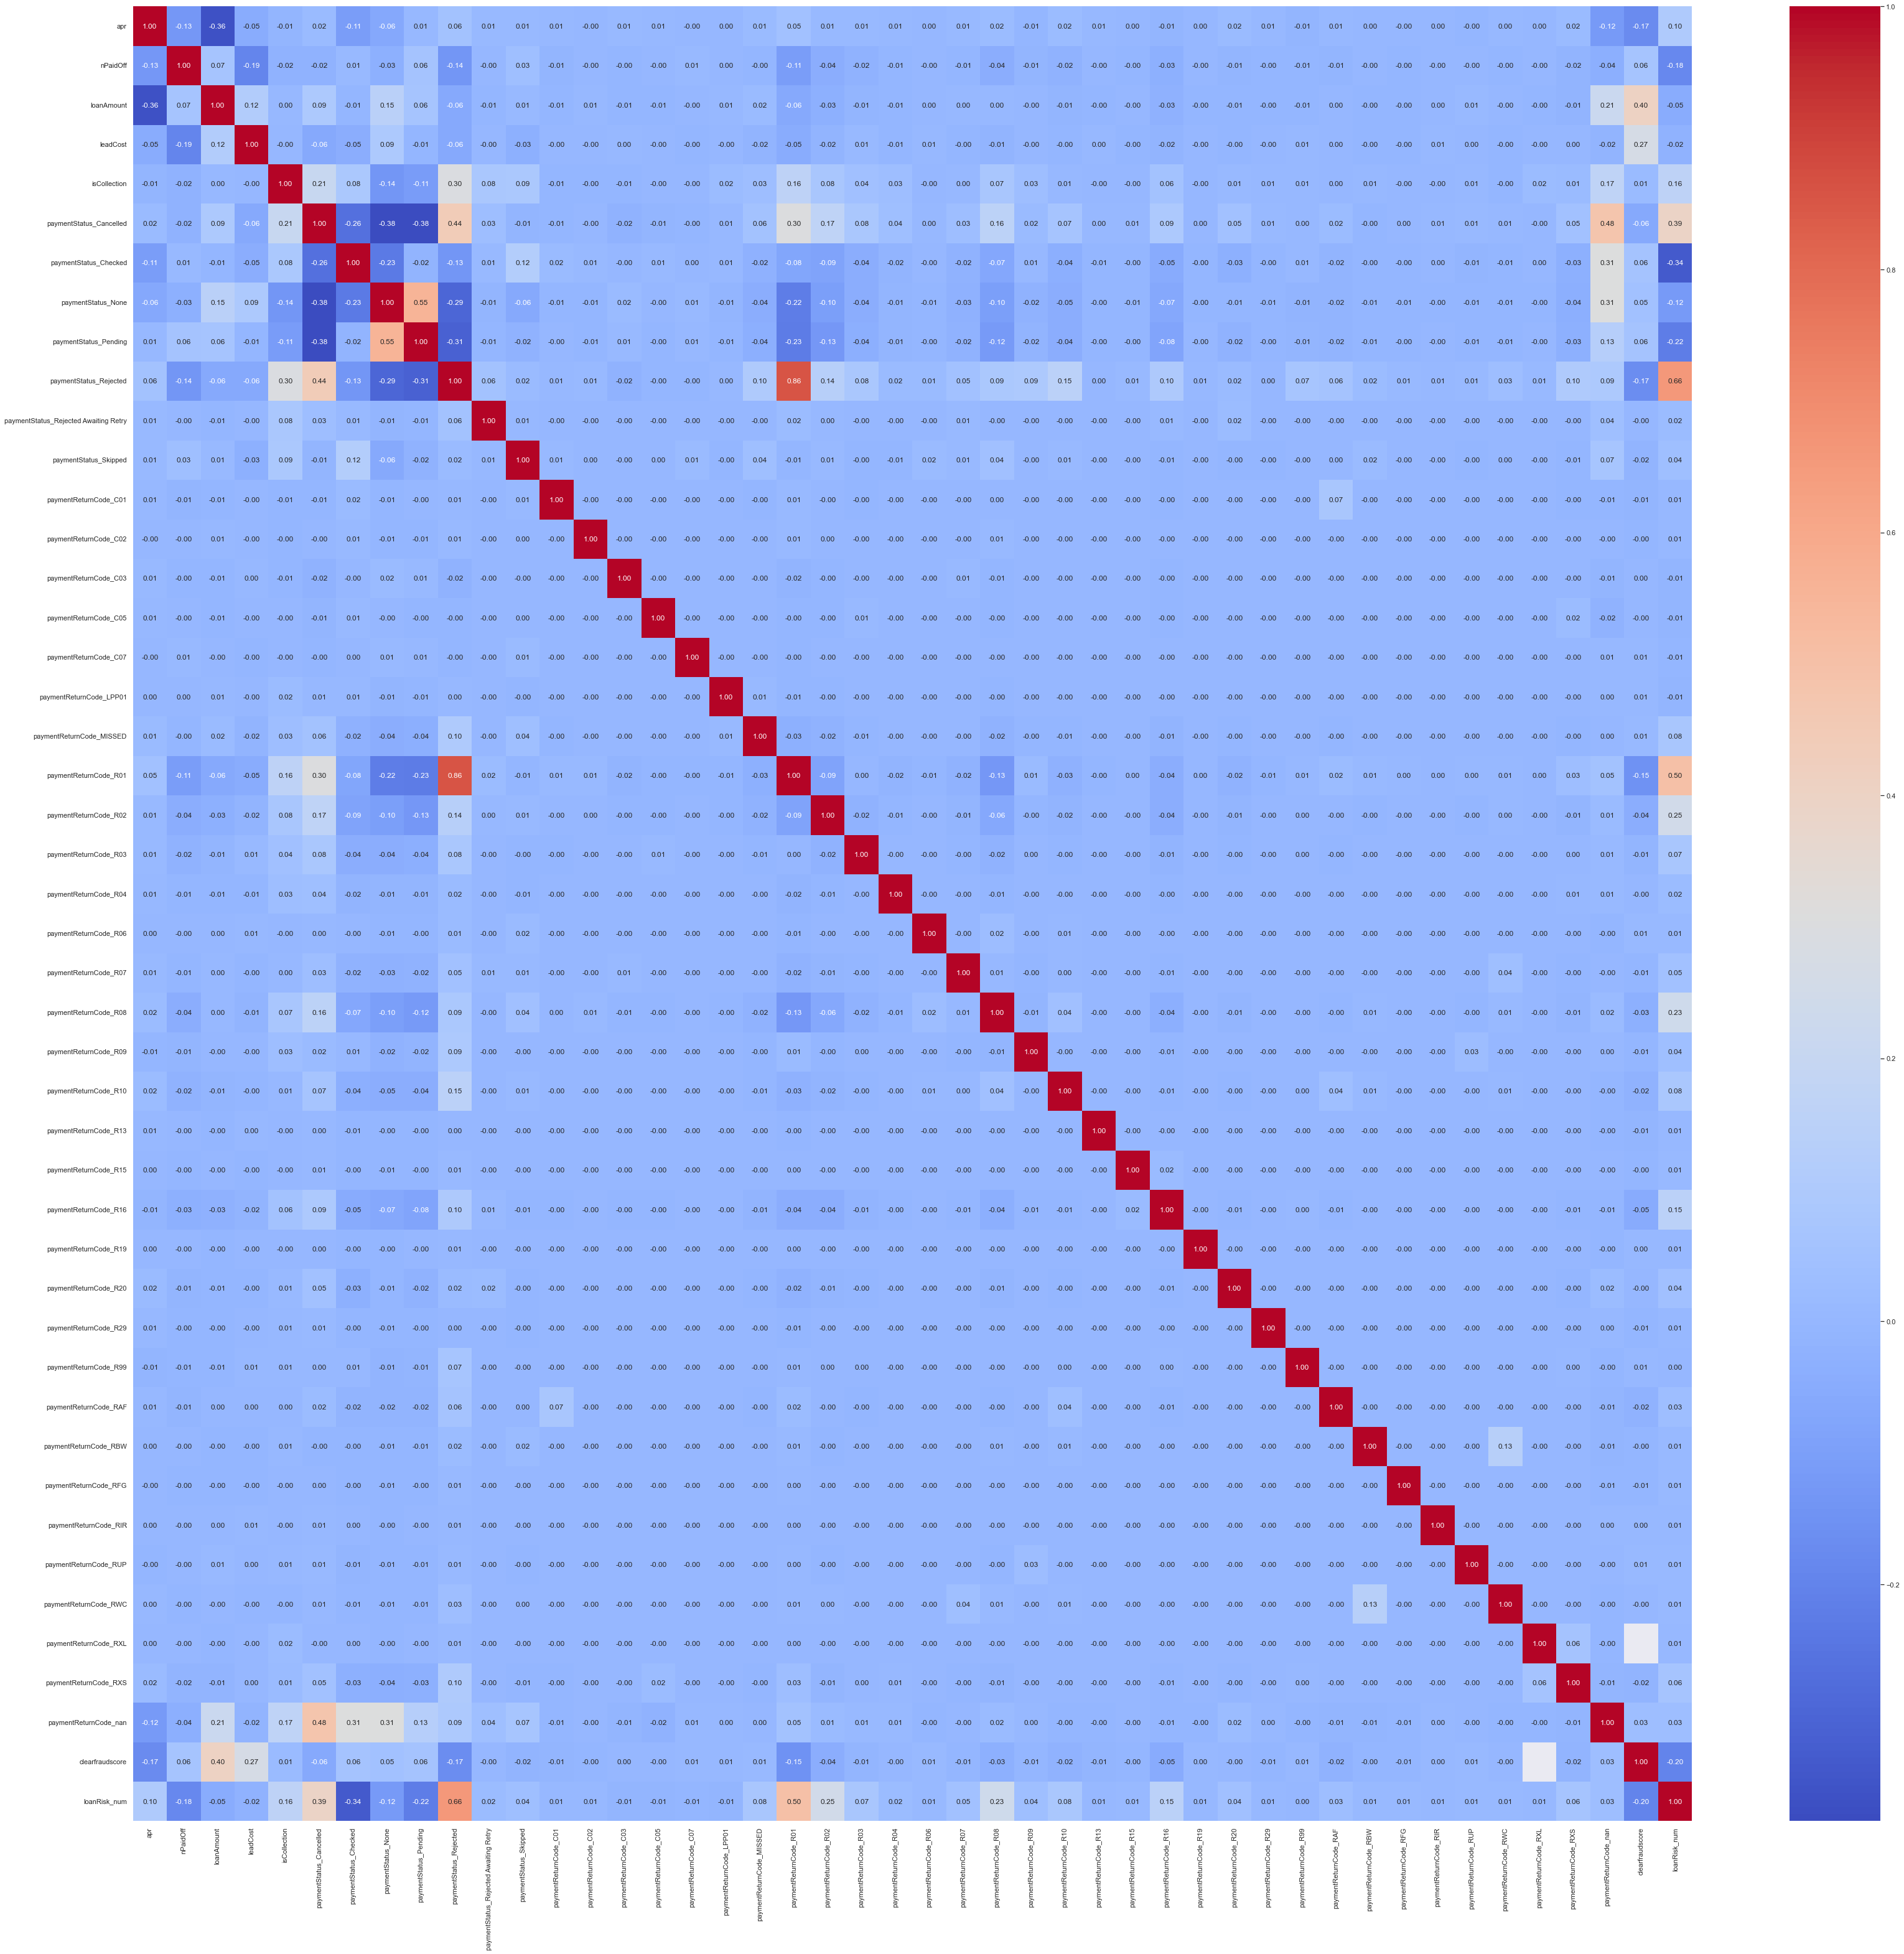

In [64]:
# calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [65]:
sns.set(rc={'figure.figsize':(10, 10)})

In [66]:
def plot_cat(df, x, y, y_order):
    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, hue_order=y_order, kind='bar', height=10, order=['Low','High']))

    plt.show()

In [67]:
y_list = ['payFrequency', 'state', 'leadType', 'fpStatus']
y_order_list = [None, None, None, None]

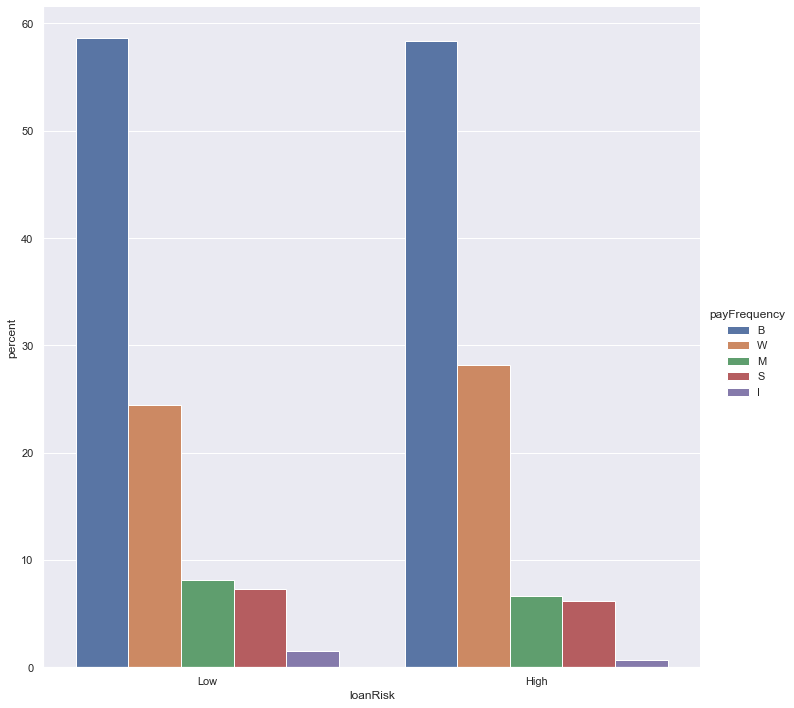

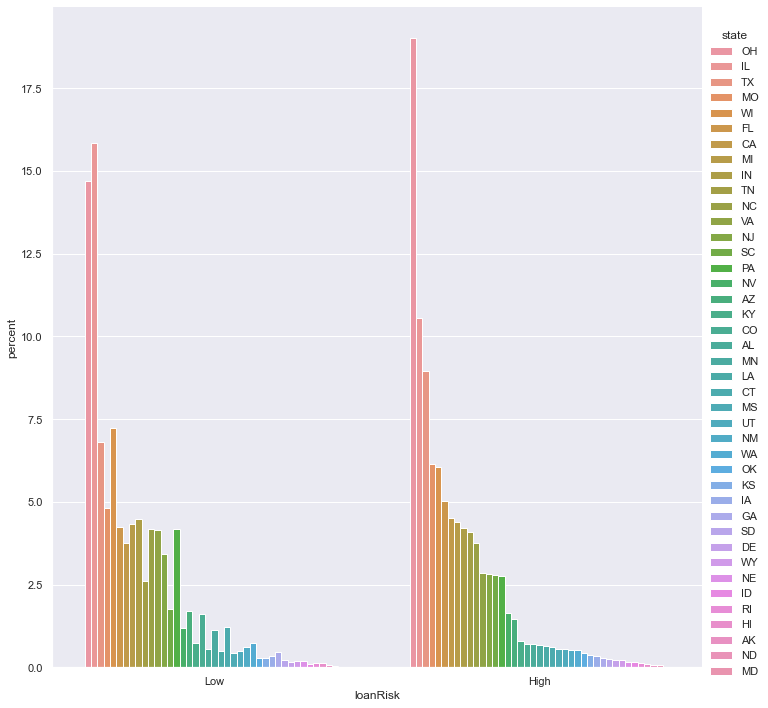

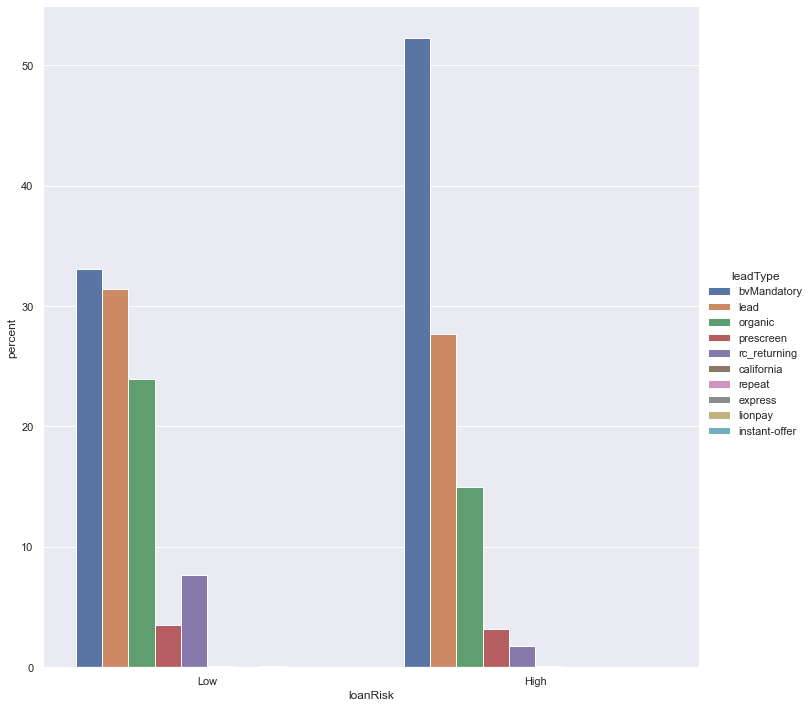

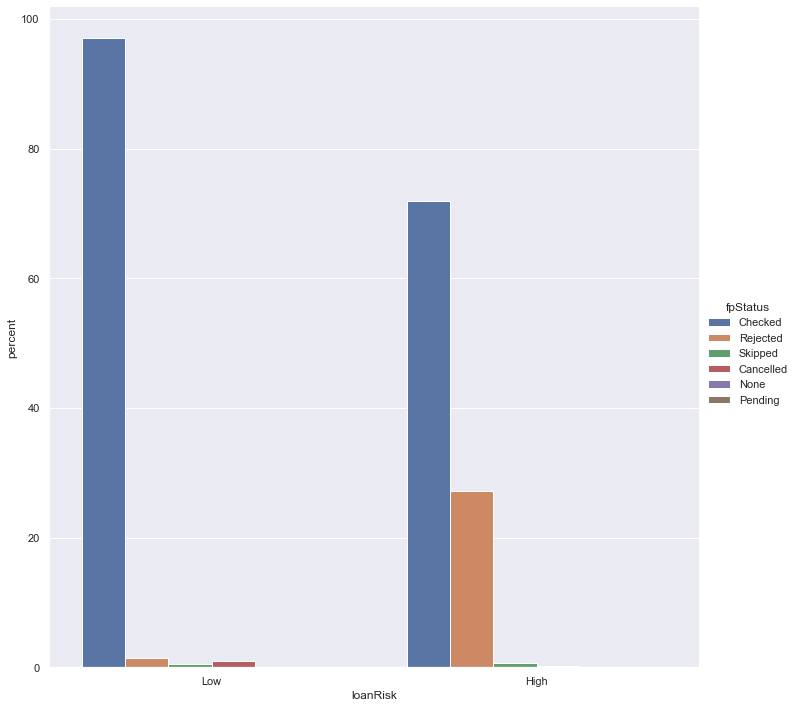

In [68]:
for y, y_order in zip(y_list, y_order_list):
    plot_cat(df=df, x='loanRisk', y=y, y_order=y_order)

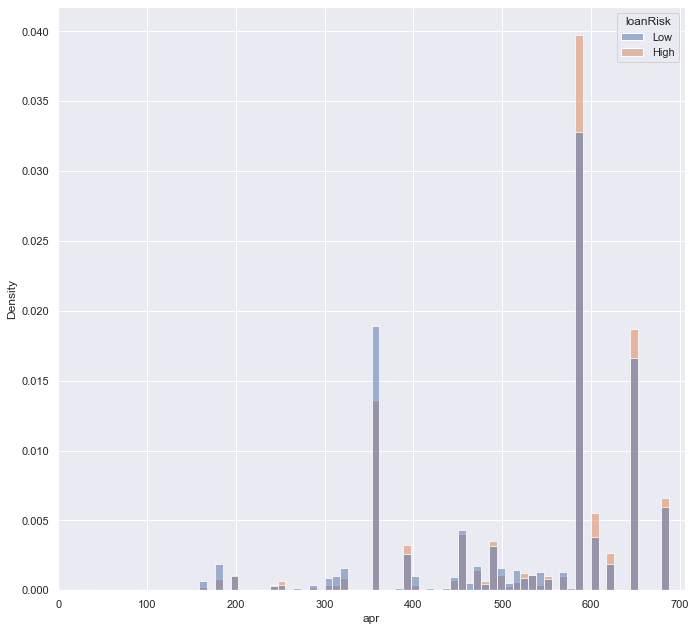

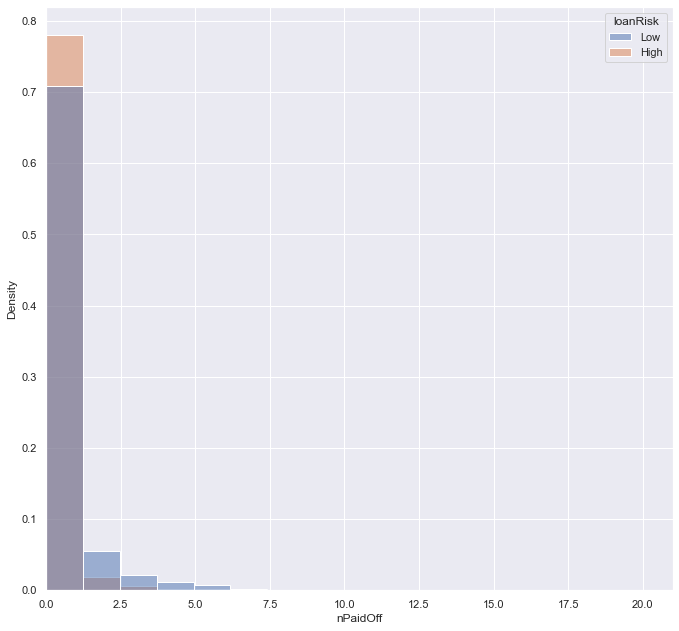

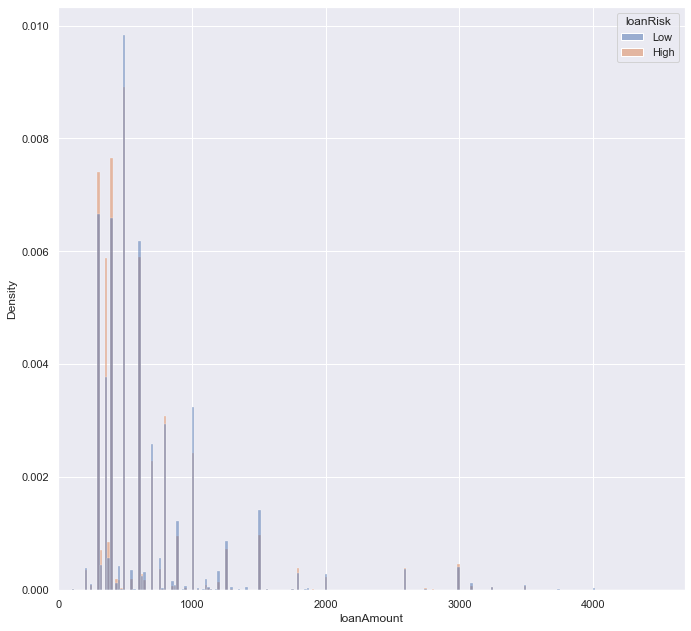

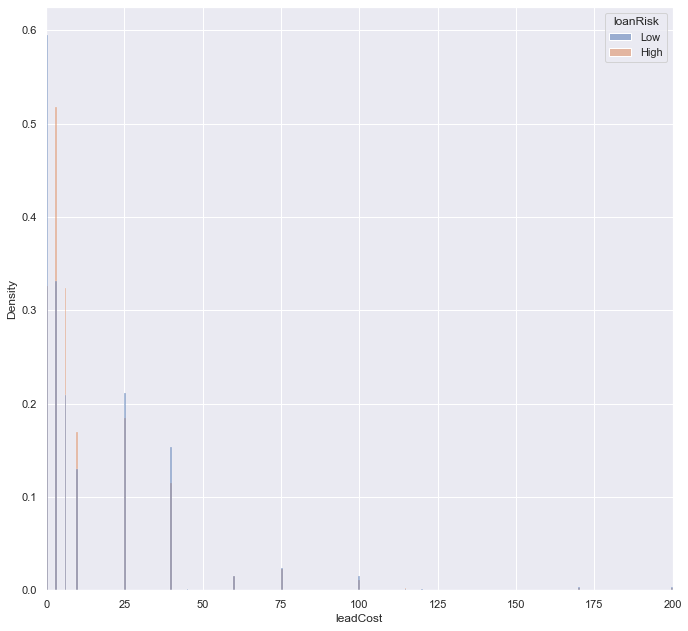

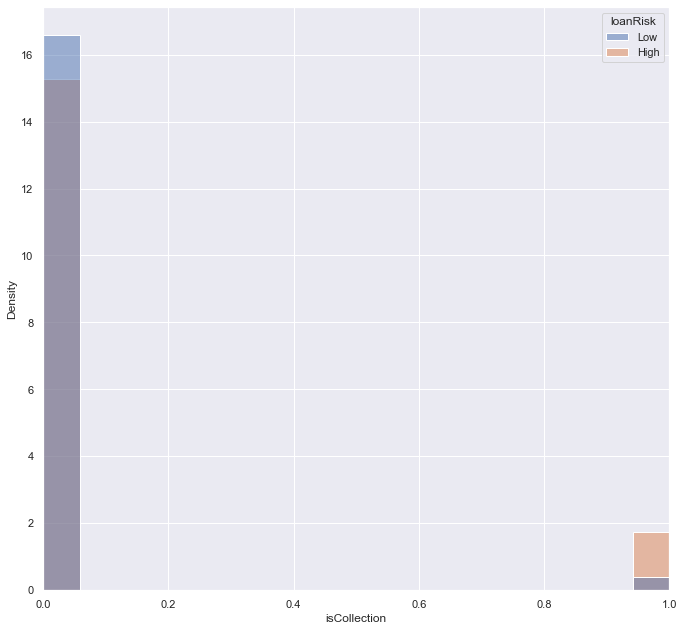

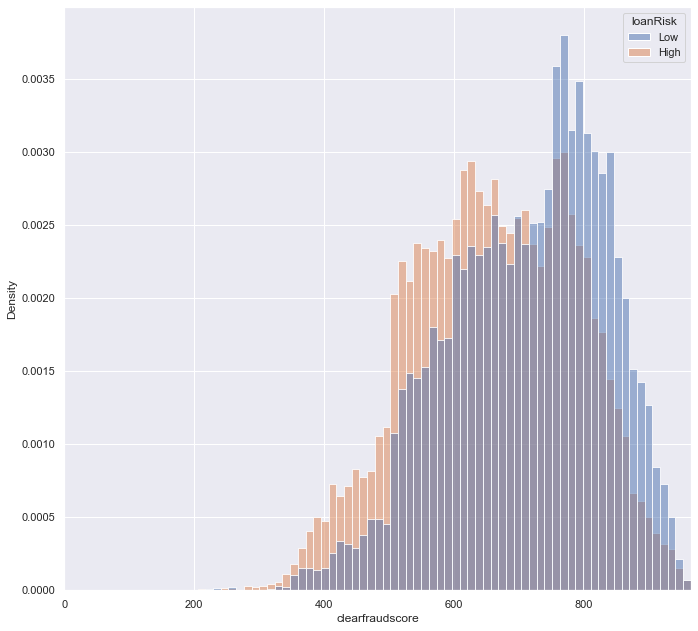

In [69]:
for i in df[['apr', 'nPaidOff', 'loanAmount', 'leadCost', 'isCollection', 'clearfraudscore']].keys():
    sns.histplot(data=df, x=i, hue="loanRisk", multiple="layer", stat='density', common_norm=False).set(xlim=(0,df[i].max()))

    plt.show()

In [70]:
paymentStatus_ReturnCode = df.groupby('loanRisk').agg({
    'paymentStatus_Cancelled': 'mean', 
    'paymentStatus_Checked': 'mean',
    'paymentStatus_None': 'mean', 
    'paymentStatus_Pending': 'mean',
    'paymentStatus_Rejected': 'mean', 
    'paymentStatus_Rejected Awaiting Retry': 'mean',
    'paymentStatus_Skipped': 'mean',
    'paymentReturnCode_C01': 'mean', 
    'paymentReturnCode_C02': 'mean',
    'paymentReturnCode_C03': 'mean', 
    'paymentReturnCode_C05': 'mean',
    'paymentReturnCode_C07': 'mean', 
    'paymentReturnCode_LPP01': 'mean',
    'paymentReturnCode_MISSED': 'mean', 
    'paymentReturnCode_R01': 'mean',
    'paymentReturnCode_R02': 'mean', 
    'paymentReturnCode_R03': 'mean',
    'paymentReturnCode_R04': 'mean', 
    'paymentReturnCode_R06': 'mean',
    'paymentReturnCode_R07': 'mean', 
    'paymentReturnCode_R08': 'mean',
    'paymentReturnCode_R09': 'mean', 
    'paymentReturnCode_R10': 'mean',
    'paymentReturnCode_R13': 'mean', 
    'paymentReturnCode_R15': 'mean',
    'paymentReturnCode_R16': 'mean', 
    'paymentReturnCode_R19': 'mean',
    'paymentReturnCode_R20': 'mean', 
    'paymentReturnCode_R29': 'mean',
    'paymentReturnCode_R99': 'mean', 
    'paymentReturnCode_RAF': 'mean',
    'paymentReturnCode_RBW': 'mean', 
    'paymentReturnCode_RFG': 'mean',
    'paymentReturnCode_RIR': 'mean', 
    'paymentReturnCode_RUP': 'mean',
    'paymentReturnCode_RWC': 'mean', 
    'paymentReturnCode_RXL': 'mean',
    'paymentReturnCode_RXS': 'mean', 
    'paymentReturnCode_nan': 'mean'
})

In [71]:
paymentStatus_ReturnCode = paymentStatus_ReturnCode.transpose()
paymentStatus_ReturnCode['Difference'] = paymentStatus_ReturnCode['High'] - paymentStatus_ReturnCode['Low']
paymentStatus_ReturnCode

loanRisk,High,Low,Difference
paymentStatus_Cancelled,9.682800,3.444677,6.238124
paymentStatus_Checked,3.353396,7.374701,-4.021304
paymentStatus_None,3.405380,4.973345,-1.567965
paymentStatus_Pending,0.128999,0.344019,-0.215020
paymentStatus_Rejected,1.553646,0.120738,1.432908
paymentStatus_Rejected Awaiting Retry,0.000935,0.000000,0.000935
paymentStatus_Skipped,0.108330,0.084705,0.023625
paymentReturnCode_C01,0.002545,0.001835,0.000710
paymentReturnCode_C02,0.000312,0.000153,0.000159
paymentReturnCode_C03,0.000571,0.001172,-0.000601


In [72]:
sns.set(rc={'figure.figsize':(20, 5)})

<AxesSubplot:>

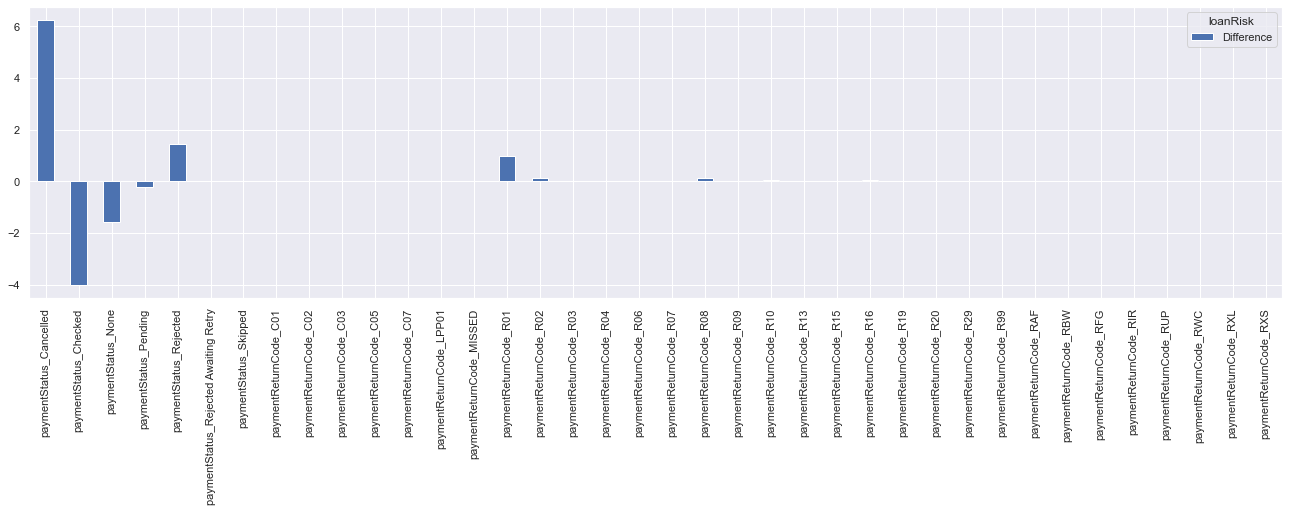

In [73]:
paymentStatus_ReturnCode[['Difference']].drop(['paymentReturnCode_nan'], axis=0).plot(kind='bar')

## Feature Selection

##### 'paymentStatus_Cancelled', 'paymentStatus_Checked', 'paymentStatus_None', 'paymentStatus_Pending', 'paymentStatus_Rejected', 'paymentReturnCode_R01', 'paymentReturnCode_R02', 'paymentReturnCode_R08', 'paymentReturnCode_R16' are selected because the difference of the mean of High and Low is more than 0.1 and correlation coefficient is more than 0.1.

In [74]:
df = df.drop(['paymentStatus_Rejected Awaiting Retry', 'paymentStatus_Skipped', 
              'paymentReturnCode_C01', 'paymentReturnCode_C02', 'paymentReturnCode_C03', 'paymentReturnCode_C05', 
              'paymentReturnCode_C07', 'paymentReturnCode_LPP01', 'paymentReturnCode_MISSED', 'paymentReturnCode_R03', 
              'paymentReturnCode_R04',  'paymentReturnCode_R06', 'paymentReturnCode_R07', 'paymentReturnCode_R09', 
              'paymentReturnCode_R10', 'paymentReturnCode_R13', 'paymentReturnCode_R15', 'paymentReturnCode_R19', 
              'paymentReturnCode_R20', 'paymentReturnCode_R29', 'paymentReturnCode_R99', 'paymentReturnCode_RAF', 
              'paymentReturnCode_RBW', 'paymentReturnCode_RFG', 'paymentReturnCode_RIR', 'paymentReturnCode_RUP', 
              'paymentReturnCode_RWC', 'paymentReturnCode_RXL', 'paymentReturnCode_RXS', 'paymentReturnCode_nan', 
              'loanRisk_num'], axis=1)

In [75]:
df

,loanId,anon_ssn,payFrequency,apr,nPaidOff,loanAmount,state,leadType,leadCost,fpStatus,isCollection,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentReturnCode_R01,paymentReturnCode_R02,paymentReturnCode_R08,paymentReturnCode_R16,clearfraudscore,loanRisk
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,0.0,3000.0,CA,prescreen,0,Checked,0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,879.0,Low
1,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2.0,350.0,MO,organic,0,Checked,0,0.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,Low
2,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,0.0,400.0,NJ,lead,40,Checked,0,0.0,0.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,658.0,Low
3,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2.0,1250.0,MO,organic,0,Checked,0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,835.0,Low
4,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,0.0,800.0,CA,bvMandatory,10,Checked,0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,624.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38872,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,3.0,600.0,CA,rc_returning,0,Checked,0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Low
38873,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,0.0,375.0,AL,lead,25,Checked,0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,Low
38874,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,0.0,400.0,WI,lead,40,Checked,0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806.0,Low
38875,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,0.0,600.0,IN,lead,25,Checked,0,0.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,769.0,Low


# Data Modelling

In [76]:
df.head(2)

,loanId,anon_ssn,payFrequency,apr,nPaidOff,loanAmount,state,leadType,leadCost,fpStatus,isCollection,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentReturnCode_R01,paymentReturnCode_R02,paymentReturnCode_R08,paymentReturnCode_R16,clearfraudscore,loanRisk
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,0.0,3000.0,CA,prescreen,0,Checked,0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,879.0,Low
1,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2.0,350.0,MO,organic,0,Checked,0,0.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,Low


In [77]:
X = df.drop(['loanId', 'anon_ssn', 'loanRisk'], axis=1)
y = df['loanRisk']

One Hot Encoding

In [78]:
cat_columns = X.select_dtypes(include=['object']).columns.tolist()

In [79]:
# Fit OHE
ohe.fit(X[cat_columns])
codes = ohe.transform(X[cat_columns]).toarray()
feature_names = ohe.get_feature_names_out(cat_columns)
categorical_encoded = pd.DataFrame(codes, columns=feature_names).astype(int)

Standardization

In [80]:
scaler = StandardScaler()
cols_to_scale = X._get_numeric_data().keys()
df_numeric_scaled = scaler.fit_transform(X._get_numeric_data())
numerical_standardize = pd.DataFrame(df_numeric_scaled, columns=cols_to_scale)

In [81]:
X_encoded_scaled = pd.concat([categorical_encoded, numerical_standardize],axis=1)
X_encoded_scaled

,payFrequency_B,payFrequency_I,payFrequency_M,payFrequency_S,payFrequency_W,state_AK,state_AL,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MD,state_MI,state_MN,state_MO,state_MS,state_NC,state_ND,state_NE,state_NJ,state_NM,state_NV,state_OH,state_OK,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WY,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,fpStatus_Cancelled,fpStatus_Checked,fpStatus_None,fpStatus_Pending,fpStatus_Rejected,fpStatus_Skipped,apr,nPaidOff,loanAmount,leadCost,isCollection,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentReturnCode_R01,paymentReturnCode_R02,paymentReturnCode_R08,paymentReturnCode_R16,clearfraudscore
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-2.646157,-0.364808,4.980225,-0.588697,-0.258323,-0.444749,2.779880,-0.636923,-0.492322,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,1.521375
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.424156,1.596289,-0.606675,-0.588697,-0.258323,-0.822246,0.270521,0.121911,1.580452,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,NaN
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.944468,-0.364808,-0.501262,1.391089,-0.258323,-0.822246,-0.900513,3.005478,3.653226,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,-0.215257
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.303395,1.596289,1.290763,-0.588697,-0.258323,0.687742,-0.733222,-0.636923,-0.492322,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,1.175620
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.501678,-0.364808,0.342044,-0.093750,-0.258323,-0.822246,1.274265,-0.636923,-0.492322,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,-0.482431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38872,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.300409,2.576837,-0.079609,-0.588697,-0.258323,0.561910,-0.398641,-0.636923,-0.492322,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,NaN
38873,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.944468,-0.364808,-0.553968,0.648669,-0.258323,-0.067252,-0.733222,-0.636923,-0.492322,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,0.114782
38874,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,-0.633475,-0.364808,-0.501262,1.391089,-0.258323,-0.822246,1.274265,-0.636923,-0.492322,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,0.947737
38875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.783453,-0.364808,-0.079609,0.648669,-0.258323,-0.822246,-0.064060,0.577211,-0.492322,-0.760383,-0.59774,-0.265878,-0.243761,-0.163564,0.656988


In [82]:
loanRisk_encode = {'High' : 1, 'Low' : 0}

y = y.map(loanRisk_encode)

In [83]:
pd.Series(y).value_counts()

0    19621
1    19256
Name: loanRisk, dtype: int64

In [84]:
# split into 70% training, 15% validating, 15% testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

In [85]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(27213, 77)
(5832, 77)
(5832, 77)
0    0.504685
1    0.495315
Name: loanRisk, dtype: float64
0    0.50463
1    0.49537
Name: loanRisk, dtype: float64
0    0.504801
1    0.495199
Name: loanRisk, dtype: float64


In [86]:
# Define Model
model = XGBClassifier()

# Define evaluation metric
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# Evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Summarize performance
print ('Score: %.5f' % np.mean(scores))

Score: 0.90926


In [87]:
sns.set(rc={'figure.figsize':(10, 30)})

f1-score 0.9108127997496589
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2944
           1       0.94      0.87      0.91      2888

    accuracy                           0.91      5832
   macro avg       0.91      0.91      0.91      5832
weighted avg       0.91      0.91      0.91      5832



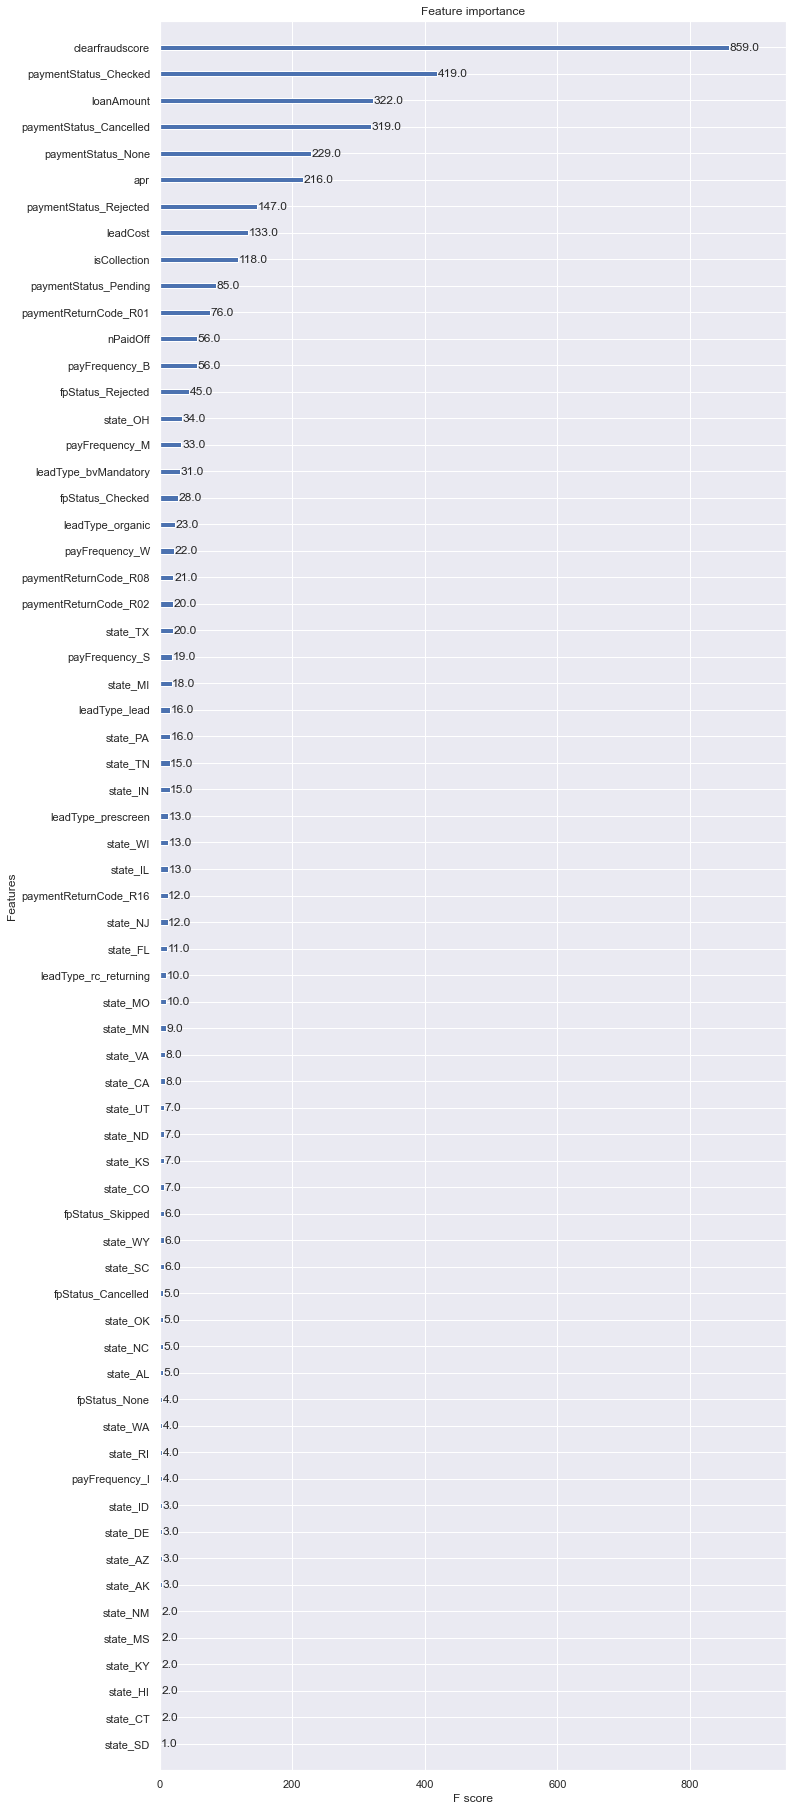

In [88]:
model_1 = XGBClassifier()
model_1.fit(X_train, y_train)
plot_importance(model_1)

# Predict and produce f1_score and classification report
pred = model_1.predict(X_test)
print ("f1-score", f1_score(y_test, pred, average="macro"))
print (classification_report(y_test, pred))

In [89]:
sns.set(rc={'figure.figsize':(5, 5)})

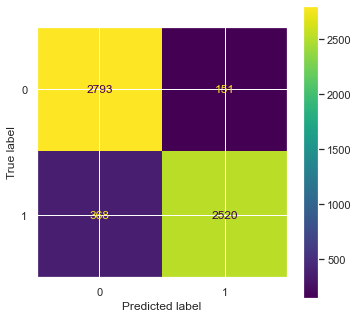

In [90]:
cm = confusion_matrix(y_test, pred, labels=model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_1.classes_)
disp.plot()

In [ ]:
# Hyper-Parameter Tuning

# Define model
model = XGBClassifier()

# Define grid
weights = [1, 2, 3, 10, 25, 50]
depth= [ 3, 4, 5, 6, 7, 8]
rate=[0.1 , 0.15, 0.2, 0.3, 0.4]

param_grid = dict(scale_pos_weight=weights, max_depth=depth, learning_rate = rate)

# Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

# Execute the grid search
grid_result = grid.fit(X_train, y_train)

# Report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
sns.set(rc={'figure.figsize':(10, 30)})

In [ ]:
model_1 = XGBClassifier(learning_rate=0.4, max_depth=4, scale_pos_weight=1)
model_1.fit(X_train, y_train)
plot_importance(model_1)

# Predict and produce f1_score and classification report
pred = model_1.predict(X_test)
print ("f1-score", f1_score(y_test, pred, average="macro"))
print (classification_report(y_test, pred))

In [ ]:
sns.set(rc={'figure.figsize':(5, 5)})

In [ ]:
cm = confusion_matrix(y_test, pred, labels=model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_1.classes_)
disp.plot()

In [ ]:
# Predict and produce f1_score and classification report
pred = model_1.predict(X_valid)
print ("f1-score", f1_score(y_valid, pred, average="macro"))
print (classification_report(y_valid, pred))

In [ ]:
# Predict_proba 
# THRESHOLD = 0.2
# preds = np.where(model_1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
proba = model_1.predict_proba(X_test)
proba = pd.DataFrame(proba)
proba = proba.drop([0], axis=1)

predicted_data = pd.concat([df[['loanId', 'anon_ssn']].iloc[X_test.index], y_test], axis=1)
predicted_data.reset_index(drop=True, inplace=True)
predicted_data = pd.concat([predicted_data, proba], axis=1)
predicted_data.rename(columns={1:'loanRisk_High_proba'}, inplace=True)
loanRisk_decode = {1 : 'High', 0 : 'Low'}
predicted_data['loanRisk'] = predicted_data['loanRisk'].map(loanRisk_decode)
predicted_data

In [ ]:
sns.histplot(data=predicted_data, x="loanRisk_High_proba")